# WeatherPy
----

### Analysis
* the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [561]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [562]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

In [563]:
cities

['lasa',
 'isangel',
 'hofn',
 'bluff',
 'bengkulu',
 'benguela',
 'elizabeth city',
 'ponta do sol',
 'komsomolskiy',
 'cidreira',
 'port alfred',
 'longyearbyen',
 'castro',
 'chagda',
 'kodiak',
 'sao filipe',
 'talnakh',
 'mahebourg',
 'kapaa',
 'rikitea',
 'hobart',
 'geraldton',
 'busselton',
 'aktash',
 'along',
 'marcona',
 'albany',
 'lebu',
 'ca mau',
 'ancud',
 'saint-philippe',
 'durres',
 'ushuaia',
 'puerto leguizamo',
 'da lat',
 'calama',
 'mataura',
 'babu',
 'georgetown',
 'sentyabrskiy',
 'mackenzie',
 'kerema',
 'khatanga',
 'east london',
 'faanui',
 'punta arenas',
 'pimenta bueno',
 'avarua',
 'victoria',
 'provideniya',
 'mys shmidta',
 'barentsburg',
 'jamestown',
 'artyk',
 'taolanaro',
 'barrow',
 'saleaula',
 'butaritari',
 'vaini',
 'anadyr',
 'iqaluit',
 'tarakan',
 'acapulco',
 'alofi',
 'paulista',
 'puerto ayora',
 'bredasdorp',
 'arraial do cabo',
 'pevek',
 'emerald',
 'mujiayingzi',
 'sault sainte marie',
 'yumen',
 'san cristobal',
 'hermanus',
 'th

In [564]:
# Converting to Data Frame
#cities_df = pd.DataFrame(cities)
#cities_df.head()

In [565]:
# Save as a csv
#cities_df.to_csv(output_data_file, encoding="utf-8", index=False)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
# Dependencies
import csv
from api_keys import api_key

In [12]:
# Get data for each city in cities.csv
#with open("output_data/cities.csv") as cities_file:
    #cities_reader = csv.reader(cities_file)
    #cities = [city for city in cities_reader]
#print(cities)  

In [569]:
cities

['lasa',
 'isangel',
 'hofn',
 'bluff',
 'bengkulu',
 'benguela',
 'elizabeth city',
 'ponta do sol',
 'komsomolskiy',
 'cidreira',
 'port alfred',
 'longyearbyen',
 'castro',
 'chagda',
 'kodiak',
 'sao filipe',
 'talnakh',
 'mahebourg',
 'kapaa',
 'rikitea',
 'hobart',
 'geraldton',
 'busselton',
 'aktash',
 'along',
 'marcona',
 'albany',
 'lebu',
 'ca mau',
 'ancud',
 'saint-philippe',
 'durres',
 'ushuaia',
 'puerto leguizamo',
 'da lat',
 'calama',
 'mataura',
 'babu',
 'georgetown',
 'sentyabrskiy',
 'mackenzie',
 'kerema',
 'khatanga',
 'east london',
 'faanui',
 'punta arenas',
 'pimenta bueno',
 'avarua',
 'victoria',
 'provideniya',
 'mys shmidta',
 'barentsburg',
 'jamestown',
 'artyk',
 'taolanaro',
 'barrow',
 'saleaula',
 'butaritari',
 'vaini',
 'anadyr',
 'iqaluit',
 'tarakan',
 'acapulco',
 'alofi',
 'paulista',
 'puerto ayora',
 'bredasdorp',
 'arraial do cabo',
 'pevek',
 'emerald',
 'mujiayingzi',
 'sault sainte marie',
 'yumen',
 'san cristobal',
 'hermanus',
 'th

In [570]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

 # Build a query URL
base_url = f"{url}units={units}&appid={api_key}&q="
#query_url = base_url + listing 
    


In [571]:
# List of five cities

#city_listing = cities

# base url
base_url = f"{url}units={units}&appid={api_key}&q="
                
cities2 = ['esperance',
 'vardo',
 'puerto ayora',
 'bengkulu',
 'albany',
 'thompson']
    
# List for holding response info
city_list = []
country = []
date = []
lat = []
lon = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
response_json = []


count = 0

index_reset = True


print(cities)

x = 0

while index_reset == True:
    
    index_reset = False

# loop throught the list of cities 
    for i in range(x, len(cities)):


        # Build a query URL
        query_url = base_url + cities[i]

        print(query_url)


        # Incorporating count into API
        count = count + 1

        #if count == 50 : 
            #time.sleep(60)
            #count = 0


        #for x in range(len(cities)):
        #print(f"Making request number: {x} for ID: {cities}")

        #print(f"Processing record: {city} for ID: {cities}")

        # Get one of the posts
        #print(url + str(cities[x]))
        #post_response = requests.get(url + str(cities[x]))

        # Save post's JSON
        #response_json.append(post_response.json())

        try:

            # Get weather data
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()

            # Add a one second interval between queries to stay within API query limits
            #time.sleep(10)

            # Append the response info to each respective list
            max_temp.append(weather_json["main"]["temp_max"])
            humidity.append(weather_json["main"]["humidity"])
            city_list.append(weather_json["name"])
            country.append(weather_json["sys"]["country"])              
            date.append(weather_json["dt"])
            lat.append(weather_json["coord"]["lat"])
            lon.append(weather_json["coord"]["lon"])
            cloudiness.append(weather_json["clouds"]["all"])
            wind_speed.append(weather_json["wind"]["speed"])


        except KeyError:  
            print("that city is not in the database")

        except ConnectionError:
            
            print(f"Connection Error index location: {i}")
            
            index_reset = True

            x = i 
        
        
    #except ConnectionResetError:
        #print("connection closed")
      

['lasa', 'isangel', 'hofn', 'bluff', 'bengkulu', 'benguela', 'elizabeth city', 'ponta do sol', 'komsomolskiy', 'cidreira', 'port alfred', 'longyearbyen', 'castro', 'chagda', 'kodiak', 'sao filipe', 'talnakh', 'mahebourg', 'kapaa', 'rikitea', 'hobart', 'geraldton', 'busselton', 'aktash', 'along', 'marcona', 'albany', 'lebu', 'ca mau', 'ancud', 'saint-philippe', 'durres', 'ushuaia', 'puerto leguizamo', 'da lat', 'calama', 'mataura', 'babu', 'georgetown', 'sentyabrskiy', 'mackenzie', 'kerema', 'khatanga', 'east london', 'faanui', 'punta arenas', 'pimenta bueno', 'avarua', 'victoria', 'provideniya', 'mys shmidta', 'barentsburg', 'jamestown', 'artyk', 'taolanaro', 'barrow', 'saleaula', 'butaritari', 'vaini', 'anadyr', 'iqaluit', 'tarakan', 'acapulco', 'alofi', 'paulista', 'puerto ayora', 'bredasdorp', 'arraial do cabo', 'pevek', 'emerald', 'mujiayingzi', 'sault sainte marie', 'yumen', 'san cristobal', 'hermanus', 'thompson', 'kargasok', 'fukue', 'port lincoln', 'avera', 'alice springs', 'sa

ConnectionError: ('Connection aborted.', ConnectionResetError(54, 'Connection reset by peer'))

In [499]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=1edac4711aee2476ea38c0e4dabed173&q=tabarqah


In [500]:
print(weather_json)


{'coord': {'lon': -0.19, 'lat': 54.08}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.68, 'pressure': 1001, 'humidity': 71, 'temp_min': 51.01, 'temp_max': 54}, 'visibility': 10000, 'wind': {'speed': 24.16, 'deg': 200}, 'clouds': {'all': 75}, 'dt': 1551548822, 'sys': {'type': 1, 'id': 1422, 'message': 0.004, 'country': 'GB', 'sunrise': 1551509167, 'sunset': 1551548425}, 'id': 2654728, 'name': 'Bridlington', 'cod': 200}


In [501]:
print(len(max_temp))

474


In [502]:
max_temp

[64.47,
 63.25,
 -19.46,
 82.4,
 59.43,
 82.65,
 72,
 23.7,
 -12.49,
 -7.58,
 80.85,
 44.6,
 6.01,
 76.08,
 39.2,
 60.01,
 72,
 36.52,
 76.39,
 78.8,
 -13.01,
 33.73,
 75.85,
 82.4,
 78.33,
 73.4,
 -4.01,
 55.38,
 64,
 60.01,
 82.96,
 36.79,
 55.4,
 66.2,
 67.35,
 53.6,
 68,
 51.8,
 37.99,
 78.8,
 32.56,
 80.6,
 17.62,
 -7.61,
 95,
 78.46,
 67.62,
 84.2,
 41,
 75.2,
 78.82,
 82.4,
 -10,
 51.8,
 30.2,
 -28.28,
 60.8,
 57.2,
 79.27,
 31.84,
 81.93,
 77,
 82.42,
 34,
 57.2,
 70.99,
 12.2,
 83.77,
 60.01,
 -2,
 76.57,
 71.6,
 42.8,
 82.4,
 30.99,
 88.5,
 -22.21,
 60.91,
 21.94,
 29.41,
 24.01,
 7.18,
 -6.91,
 87.15,
 70.68,
 60.8,
 14,
 82.24,
 74.82,
 91.15,
 74.68,
 -7.01,
 72,
 62.01,
 -7.04,
 68.74,
 82.83,
 28.4,
 11.68,
 5,
 71.6,
 74.05,
 87.28,
 69.8,
 57,
 30.99,
 43.63,
 70,
 89.6,
 20.82,
 -24.86,
 26.01,
 82.83,
 72.03,
 62.6,
 76.93,
 28.06,
 37.4,
 30.22,
 43,
 82.96,
 -15,
 86,
 59,
 71.6,
 70,
 12,
 84.2,
 5.2,
 77.43,
 79.54,
 75.58,
 89.6,
 46.38,
 67.21,
 61,
 75.2,
 75.

In [503]:
print(len(humidity))

474


In [506]:
humidity

[80,
 84,
 28,
 78,
 23,
 100,
 77,
 100,
 78,
 76,
 100,
 93,
 83,
 100,
 86,
 49,
 83,
 84,
 99,
 100,
 57,
 93,
 27,
 58,
 100,
 73,
 64,
 90,
 82,
 28,
 100,
 52,
 76,
 63,
 74,
 81,
 89,
 93,
 50,
 88,
 100,
 54,
 75,
 63,
 34,
 100,
 96,
 70,
 86,
 64,
 94,
 78,
 62,
 81,
 100,
 0,
 55,
 58,
 43,
 84,
 15,
 73,
 60,
 68,
 58,
 26,
 66,
 98,
 100,
 68,
 17,
 78,
 60,
 65,
 92,
 76,
 32,
 36,
 100,
 97,
 41,
 75,
 74,
 58,
 35,
 55,
 78,
 100,
 89,
 52,
 30,
 69,
 77,
 63,
 74,
 89,
 48,
 57,
 69,
 77,
 93,
 47,
 19,
 83,
 71,
 46,
 97,
 88,
 66,
 86,
 36,
 84,
 62,
 91,
 93,
 85,
 85,
 74,
 87,
 100,
 100,
 68,
 58,
 67,
 68,
 94,
 83,
 70,
 100,
 78,
 85,
 61,
 66,
 100,
 79,
 100,
 83,
 79,
 64,
 62,
 72,
 58,
 20,
 82,
 48,
 61,
 81,
 89,
 82,
 32,
 74,
 100,
 99,
 100,
 75,
 51,
 29,
 50,
 55,
 78,
 91,
 100,
 39,
 79,
 82,
 80,
 67,
 54,
 71,
 83,
 100,
 65,
 68,
 68,
 71,
 331,
 64,
 69,
 66,
 81,
 75,
 77,
 52,
 21,
 66,
 73,
 99,
 66,
 77,
 88,
 66,
 29,
 79,
 88,
 78,
 49

In [507]:
print(len(lat))

474


In [508]:
lat

[-34,
 15.34,
 71.98,
 -22.97,
 29.16,
 -2.57,
 -33.93,
 64.42,
 70.62,
 69.7,
 -9.8,
 60.15,
 64.86,
 -0.91,
 63.44,
 -33.64,
 32.3,
 -46.19,
 7.98,
 -21.21,
 55.74,
 47.65,
 24,
 18.42,
 -23.12,
 -1.5,
 65.28,
 5.83,
 -42.88,
 45.76,
 -0.6,
 33.6,
 -54.81,
 22.08,
 -23.58,
 -13.65,
 -34.42,
 -53.16,
 42.65,
 5.28,
 67.67,
 17.01,
 33.4,
 69.44,
 7.05,
 -0.61,
 -20.63,
 6.8,
 62.58,
 -23.53,
 21.46,
 -20.41,
 62.45,
 48.95,
 60.79,
 61.13,
 -41.87,
 39.45,
 -36.62,
 -45.41,
 13.58,
 -34.83,
 -23.11,
 52.18,
 39.42,
 18.74,
 49.72,
 4.42,
 36.62,
 77.48,
 15.46,
 -34.53,
 35.73,
 18.53,
 59.7,
 -23.13,
 71.97,
 8.96,
 50.68,
 43.32,
 39.95,
 60.75,
 73.51,
 3.17,
 -33.21,
 -42.48,
 49.78,
 3.07,
 15.51,
 -9.17,
 -30.97,
 63.75,
 -33.59,
 19.71,
 68.75,
 -8.93,
 -10.07,
 45.36,
 69.38,
 70.47,
 -28.65,
 -38.31,
 10.64,
 -11.78,
 45.6,
 47.66,
 29.04,
 -34.58,
 -3.13,
 61.81,
 70,
 37.17,
 5.48,
 18.42,
 -37.83,
 3.34,
 50.26,
 58.6,
 57.06,
 58.61,
 -16.7,
 49.23,
 15.09,
 43.21,
 -33.0

In [509]:
print(len(lon))

474


In [510]:
lon

[24.73,
 74.49,
 102.47,
 -42.02,
 16.14,
 150.8,
 18.42,
 -173.23,
 147.9,
 170.27,
 -139.03,
 -1.15,
 -147.8,
 122.88,
 -20.27,
 115.35,
 -64.78,
 168.86,
 49.82,
 -159.78,
 -97.86,
 53.35,
 -103.02,
 -64.62,
 -134.97,
 33.81,
 -126.83,
 -72.84,
 147.33,
 8.56,
 73.08,
 56.92,
 -68.31,
 -159.32,
 149.07,
 -73.37,
 19.24,
 -70.91,
 -73.75,
 115.24,
 12.69,
 54.1,
 49.69,
 -133.03,
 3.9,
 -47.36,
 -46,
 -58.16,
 6.12,
 148.16,
 -71.14,
 57.7,
 -114.38,
 4.24,
 -161.76,
 149.63,
 -73.83,
 22.34,
 -64.29,
 167.72,
 -2.42,
 138.5,
 26.83,
 20.84,
 22.43,
 7.39,
 -86.95,
 -7.36,
 -121.92,
 -69.36,
 6.28,
 20.04,
 140.83,
 -92.64,
 30.79,
 -64.33,
 114.09,
 38.73,
 156.12,
 145.57,
 -94.76,
 -137.51,
 80.55,
 -52.33,
 138.6,
 -73.76,
 -74.86,
 172.79,
 80.05,
 -60.63,
 22.13,
 -68.52,
 26.89,
 -155.08,
 161.3,
 125.41,
 -78.15,
 -73.48,
 178.42,
 -68.59,
 153.62,
 -60.23,
 -4.75,
 19.91,
 -0.6,
 -52.73,
 114.56,
 150.85,
 -59.98,
 36.54,
 135.55,
 -99.65,
 -53.21,
 84.04,
 140.78,
 20.89,
 

In [511]:
print(len(city_list))

474


In [512]:
city_list

['Kruisfontein',
 'Vaini',
 'Khatanga',
 'Arraial do Cabo',
 'Waddan',
 'Kavieng',
 'Cape Town',
 'Provideniya',
 'Chokurdakh',
 'Pevek',
 'Atuona',
 'Lerwick',
 'College',
 'Biak',
 'Vestmannaeyjar',
 'Busselton',
 'Hamilton',
 'Mataura',
 'Eyl',
 'Avarua',
 'Thompson',
 'Makat',
 'Nieves',
 'Road Town',
 'Rikitea',
 'Musoma',
 'Norman Wells',
 'Corrales',
 'Hobart',
 'Arona',
 'Hithadhoo',
 'Tabas',
 'Ushuaia',
 'Kapaa',
 'Bluff',
 'San Jeronimo',
 'Hermanus',
 'Punta Arenas',
 'Albany',
 'Victoria',
 'Sorland',
 'Salalah',
 'Aligudarz',
 'Tuktoyaktuk',
 'Arawa',
 'Salinopolis',
 'Ponta do Sol',
 'Georgetown',
 'Roald',
 'Emerald',
 'Cockburn Town',
 'Mahebourg',
 'Yellowknife',
 'Saint-Pierre',
 'Bethel',
 'Ust-Omchug',
 'Ancud',
 'Saint George',
 'Santa Rosa',
 'Te Anau',
 'Ouahigouya',
 'Peterhead',
 'Mahalapye',
 'Piastow',
 'Chara',
 'Arlit',
 'Geraldton',
 'Tabou',
 'Pacific Grove',
 'Qaanaaq',
 'Abalak',
 'Bredasdorp',
 'Hasaki',
 'Frontera',
 'Nikolskoye',
 'San Ramon de la N

In [513]:
print(len(wind_speed))

474


In [514]:
wind_speed

[1.83,
 3.18,
 2.95,
 8.05,
 8.21,
 4.97,
 12.75,
 7.99,
 16.49,
 4.63,
 10.89,
 19.46,
 2.73,
 0.94,
 4.7,
 13.47,
 20.8,
 2.84,
 6.76,
 1.12,
 5.82,
 14.81,
 4.41,
 11.41,
 10.67,
 7.99,
 14.99,
 2.39,
 4.7,
 4.7,
 15.26,
 2.39,
 5.82,
 5.82,
 8.88,
 5.82,
 3,
 5.82,
 4.7,
 4.7,
 15.26,
 9.17,
 3.18,
 12.75,
 11.41,
 9.89,
 9.78,
 13.87,
 12.75,
 12.75,
 16.49,
 11.41,
 4.7,
 13.87,
 8.05,
 2.51,
 4.7,
 6.93,
 4.74,
 2.39,
 5.75,
 3.62,
 3.29,
 3.36,
 6.93,
 6.2,
 12.75,
 9.33,
 9.17,
 11.79,
 9.22,
 6.93,
 5.82,
 4.7,
 22.37,
 4.63,
 2.95,
 5.19,
 12.57,
 12.12,
 9.17,
 1.72,
 8.1,
 3.85,
 7.31,
 4.7,
 1.61,
 13.24,
 5.86,
 2.95,
 7.54,
 20.8,
 3,
 6.93,
 8.43,
 0.16,
 4.74,
 10.29,
 14.14,
 25.28,
 10.45,
 11.79,
 6.08,
 10.29,
 16.11,
 40.26,
 2.62,
 6.93,
 6.93,
 15.03,
 2.95,
 5.01,
 6.76,
 1.72,
 12.75,
 3.29,
 12.68,
 13.87,
 19.84,
 14.99,
 6.42,
 17.22,
 6.93,
 14.99,
 6.93,
 8.05,
 2.73,
 8.05,
 3.62,
 2.62,
 6.98,
 1.28,
 5.82,
 3.62,
 3.74,
 26.44,
 9.17,
 17.83,
 18.72,


In [515]:
print(len(cloudiness))

474


In [516]:
cloudiness

[92,
 0,
 0,
 75,
 0,
 0,
 20,
 80,
 76,
 48,
 20,
 40,
 1,
 8,
 75,
 0,
 75,
 0,
 0,
 0,
 40,
 88,
 0,
 40,
 0,
 75,
 5,
 88,
 0,
 0,
 0,
 0,
 75,
 90,
 0,
 75,
 12,
 90,
 90,
 75,
 0,
 40,
 0,
 20,
 40,
 88,
 92,
 75,
 90,
 75,
 88,
 75,
 5,
 90,
 90,
 12,
 40,
 75,
 0,
 0,
 0,
 0,
 12,
 0,
 75,
 0,
 90,
 0,
 90,
 0,
 0,
 44,
 75,
 5,
 90,
 12,
 24,
 8,
 56,
 0,
 75,
 88,
 24,
 80,
 0,
 40,
 1,
 56,
 0,
 36,
 0,
 20,
 92,
 1,
 68,
 8,
 12,
 75,
 0,
 75,
 90,
 0,
 0,
 75,
 20,
 20,
 92,
 48,
 40,
 88,
 48,
 44,
 76,
 80,
 48,
 12,
 64,
 88,
 88,
 90,
 64,
 1,
 40,
 75,
 40,
 75,
 1,
 40,
 12,
 36,
 36,
 64,
 40,
 0,
 0,
 80,
 40,
 0,
 0,
 48,
 20,
 32,
 5,
 0,
 0,
 75,
 44,
 92,
 75,
 0,
 90,
 12,
 0,
 92,
 90,
 0,
 0,
 20,
 40,
 75,
 80,
 20,
 44,
 20,
 40,
 20,
 12,
 0,
 8,
 80,
 36,
 90,
 40,
 75,
 92,
 75,
 64,
 5,
 20,
 90,
 90,
 8,
 0,
 0,
 20,
 20,
 1,
 20,
 0,
 40,
 56,
 0,
 75,
 75,
 36,
 20,
 0,
 48,
 20,
 90,
 64,
 92,
 0,
 0,
 5,
 75,
 5,
 76,
 20,
 75,
 90,
 0,
 20,
 40,


In [517]:
print(len(date))

474


In [518]:
date

[1551548075,
 1551547786,
 1551548075,
 1551546000,
 1551548075,
 1551547846,
 1551547653,
 1551548076,
 1551548076,
 1551548077,
 1551547778,
 1551547200,
 1551547845,
 1551548078,
 1551546000,
 1551547810,
 1551547121,
 1551548078,
 1551548079,
 1551547800,
 1551546000,
 1551548079,
 1551548079,
 1551548015,
 1551548080,
 1551546000,
 1551546000,
 1551548080,
 1551547996,
 1551548063,
 1551547787,
 1551548081,
 1551546000,
 1551547854,
 1551548082,
 1551546000,
 1551547905,
 1551547994,
 1551547800,
 1551546000,
 1551548087,
 1551545400,
 1551548087,
 1551546000,
 1551546000,
 1551548148,
 1551548148,
 1551546000,
 1551548105,
 1551547743,
 1551548015,
 1551548046,
 1551548119,
 1551548109,
 1551546060,
 1551548156,
 1551546000,
 1551545400,
 1551548159,
 1551548159,
 1551548058,
 1551548140,
 1551548160,
 1551548145,
 1551545400,
 1551548160,
 1551546000,
 1551548161,
 1551547879,
 1551548161,
 1551548161,
 1551547875,
 1551548076,
 1551545100,
 1551548134,
 1551548166,
 1551548166,

In [519]:
print(len(country))

474


In [520]:
country

['ZA',
 'IN',
 'RU',
 'BR',
 'LY',
 'PG',
 'ZA',
 'RU',
 'RU',
 'RU',
 'PF',
 'GB',
 'US',
 'ID',
 'IS',
 'AU',
 'BM',
 'NZ',
 'SO',
 'CK',
 'CA',
 'KZ',
 'MX',
 'VG',
 'PF',
 'TZ',
 'CA',
 'CO',
 'AU',
 'IT',
 'MV',
 'IR',
 'AR',
 'US',
 'AU',
 'PE',
 'ZA',
 'CL',
 'US',
 'BN',
 'NO',
 'OM',
 'IR',
 'CA',
 'NG',
 'BR',
 'BR',
 'GY',
 'NO',
 'AU',
 'TC',
 'MU',
 'CA',
 'FR',
 'US',
 'RU',
 'CL',
 'GR',
 'AR',
 'NZ',
 'BF',
 'AU',
 'BW',
 'PL',
 'GR',
 'NE',
 'CA',
 'CI',
 'US',
 'GL',
 'NE',
 'ZA',
 'JP',
 'MX',
 'RU',
 'AR',
 'RU',
 'ET',
 'RU',
 'JP',
 'US',
 'CA',
 'RU',
 'GF',
 'AU',
 'CL',
 'CA',
 'KI',
 'IN',
 'BR',
 'ZA',
 'CA',
 'ZA',
 'US',
 'RU',
 'TL',
 'PE',
 'CA',
 'RU',
 'CA',
 'AU',
 'AR',
 'BF',
 'AO',
 'FR',
 'CA',
 'CN',
 'AU',
 'BR',
 'RU',
 'RU',
 'US',
 'GF',
 'IN',
 'AU',
 'CD',
 'KZ',
 'SE',
 'RU',
 'NO',
 'PF',
 'CA',
 'HN',
 'ES',
 'ZA',
 'AU',
 'US',
 'EC',
 'RU',
 'CF',
 'MG',
 'CO',
 'EC',
 'NZ',
 'IN',
 'LY',
 'AU',
 'CV',
 'UY',
 'RU',
 'PT',
 'CN',
 'MX',

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
import csv
import pandas as pd


# Get data for each city in cities.csv
with open("output_data/cities.csv") as cities_file:
    cities_reader = csv.reader(cities_file)
    cities = [city for city in cities_reader]

In [30]:
cities

[['City',
  'Cloudiness',
  'Country',
  'Date',
  'Humidity',
  'Lat',
  'Lng',
  'Max Temp',
  'Wind Speed'],
 ['Kruisfontein',
  '92',
  'ZA',
  '1551548075',
  '80',
  '-34.0',
  '24.73',
  '64.47',
  '1.83'],
 ['Vaini', '0', 'IN', '1551547786', '84', '15.34', '74.49', '63.25', '3.18'],
 ['Khatanga',
  '0',
  'RU',
  '1551548075',
  '28',
  '71.98',
  '102.47',
  '-19.46',
  '2.95'],
 ['Arraial do Cabo',
  '75',
  'BR',
  '1551546000',
  '78',
  '-22.97',
  '-42.02',
  '82.4',
  '8.05'],
 ['Waddan', '0', 'LY', '1551548075', '23', '29.16', '16.14', '59.43', '8.21'],
 ['Kavieng',
  '0',
  'PG',
  '1551547846',
  '100',
  '-2.57',
  '150.8',
  '82.65',
  '4.97'],
 ['Cape Town',
  '20',
  'ZA',
  '1551547653',
  '77',
  '-33.93',
  '18.42',
  '72.0',
  '12.75'],
 ['Provideniya',
  '80',
  'RU',
  '1551548076',
  '100',
  '64.42',
  '-173.23',
  '23.7',
  '7.99'],
 ['Chokurdakh',
  '76',
  'RU',
  '1551548076',
  '78',
  '70.62',
  '147.9',
  '-12.49',
  '16.49'],
 ['Pevek', '48', 'RU',

In [ ]:
cities_df = pd.DataFrame(cities)
cities_df.head

In [27]:
CityData_Weather = pd.DataFrame({
    "City": City, 
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
})
                        
CityData_Weather.head()

NameError: name 'City' is not defined

In [522]:
# Save as a csv
CityData_Weather.to_csv(output_data_file, encoding="utf-8", index=False)

In [6]:
Clean_CityData_Weather = CityData_Weather.loc[CityData_Weather[Humidity] == "80", :]

Clean_CityData_Weather.head()



NameError: name 'CityData_Weather' is not defined

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

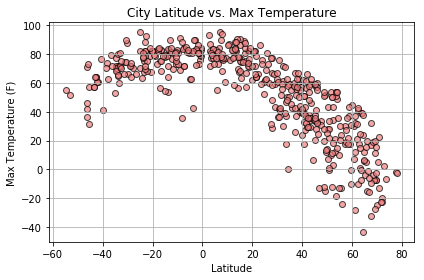

In [523]:
# Build scatter plot for Temperature vs. Latitude

plt.scatter (lat, max_temp, facecolors="lightcoral", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.grid()
plt.savefig("images/MaxTemp.png")
plt.tight_layout()
plt.show()


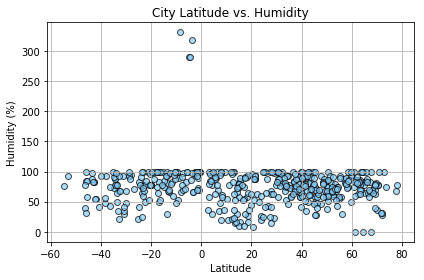

In [524]:
# Build scatter plot for Humidity vs. Latitude

plt.scatter (lat, humidity, facecolors="lightskyblue", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid()
plt.savefig("images/Humidity.png")
plt.tight_layout()
plt.show()

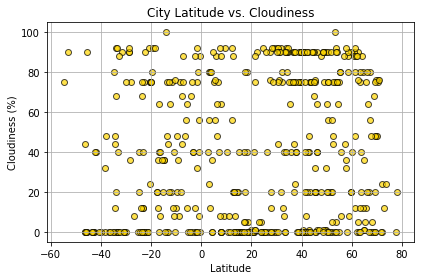

In [525]:
# Build scatter plot for Cloudiness vs. Latitude

plt.scatter (lat, cloudiness, facecolors="gold", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.grid()
plt.savefig("images/Cloudiness.png")
plt.tight_layout()
plt.show()

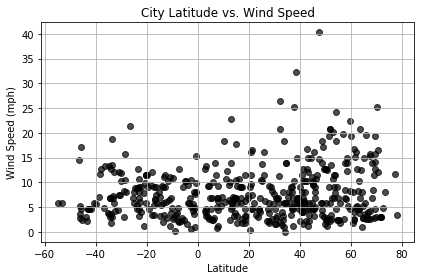

In [526]:
# Build scatter plot for Wind Speed vs. Latitude

plt.scatter (lat, wind_speed, facecolors="black", edgecolors="black", alpha=0.7, linewidth=1, marker="o")

# Incorporate title and labels into the scatter plots 

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid()
plt.savefig("images/Wind.png")
plt.tight_layout()
plt.show()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

#### Latitude vs. Temperature Plot

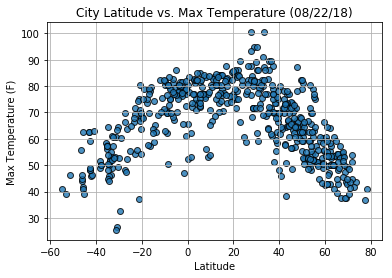

#### Latitude vs. Humidity Plot

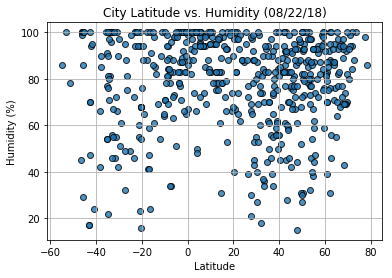

#### Latitude vs. Cloudiness Plot

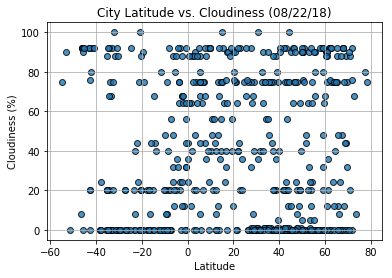

#### Latitude vs. Wind Speed Plot

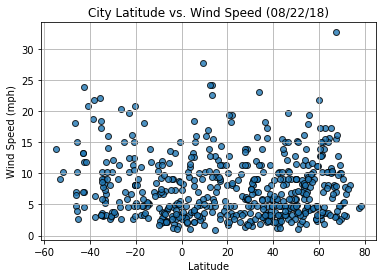